<a href="https://colab.research.google.com/github/gannannavelorange/575/blob/master/src/IB_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!git clone https://github.com/gannannavelorange/575

Cloning into '575'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 590 (delta 19), reused 0 (delta 0), pack-reused 548
Receiving objects: 100% (590/590), 2.50 MiB | 4.76 MiB/s, done.
Resolving deltas: 100% (243/243), done.


In [9]:
cd 575/src/data_IB_project

/content/575/src/data_IB_project


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import t

# VaR and ES

In [0]:
#VaR
def VaRnorm(alpha,mu,sigma):
  VaR=mu+sigma*norm.ppf(alpha)
  ES=mu+sigma*norm.pdf(norm.ppf(alpha))/(1-alpha)
  return VaR,ES


In [0]:
def VaRt(alpha,mu,sigma,v):
  VaR=mu+sigma*t.ppf(alpha,v)
  E=t.pdf(t.ppf(alpha,v),v)/(1-alpha)*(v+(t.ppf(alpha,v))**2)/(v-1)
  ES=mu+sigma*E
  return VaR,ES

# Stock&ETF

In [0]:
#using WEEKLY log return
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT','GOOG','CHEF','SPB','ORCL']
def getData(N):  
    mu=np.zeros(15)
    Is=[i for i in range(15)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader] 
        mu[i]=np.mean([float(row) for row in rows[1+N:53+N]]) #mean
        Rows.append([float(row) for row in rows[1+N:53+N]])
    Sigma=np.cov(np.array(Rows)) #covariance matrix
    return mu,Sigma,rows

In [0]:
def getdata1(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      col0=[row[0] for row in rows[1:62]]
      col0=[float(c) for c in col0] # port value
      col1=[row[1] for row in rows[1+N:53+N]]
      col1=[float(c) for c in col1]  # port loss
      
  return col0,col1

In [0]:
#linearized loss mean&variance
def lin_loss(Vt,Wt,mu,omega):
  mean=-Vt*(np.dot(Wt,mu))
  variance=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return mean,variance

In [0]:
#rolling window for linearized loss assuming log return change follows Normal distribution 
def stock_norm():
  MU=[]
  VAR=[]
  for i in range(0,10):
    data= getData(i+1)
    mu=data[0]
    Sigma=data[1]
    vt=getdata1('PORT_VALUE',i)[0]
    wt=np.ones(15)*(1/15)
    linloss=lin_loss(vt[i+51]*400000,wt,mu,Sigma)
    MU.append(linloss[0])
    VAR.append(linloss[1])
  return MU,VAR
 #print(MU)
 #print(VAR)

In [0]:
#rolling window  assuming portfolio loss follows t distribution 
def stock_t():
  df=[]
  mu=[]
  sigma=[]
  for i in range(0,10):
    data=np.array(getdata1('PORT_VALUE',i)[1])*400000
    T=t.fit(data)
    df.append(T[0])
    mu.append(T[1])
    sigma.append(T[2])
  return df,mu,sigma
#print(T_df)
#print(T_mu)
#print(T_sigma)

In [0]:
# plot VaR and ES vs time
def plot_N(name):
  N1=VaRnorm(0.9,name[0],np.sqrt(name[1]))
  N2=VaRnorm(0.95,name[0],np.sqrt(name[1]))
  N3=VaRnorm(0.99,name[0],np.sqrt(name[1]))
  x=np.linspace(1,10,10)
  plt.plot(x,N1[0],'orange',label="VaR_0.9")
  plt.plot(x,N1[1],'blue',label="ES_0.9")
  plt.plot(x,N2[0],'yellow',label="VaR_0.95")
  plt.plot(x,N2[1],'green',label="ES_0.95")
  plt.plot(x,N3[0],'red',label="VaR_0.99")
  plt.plot(x,N3[1],'purple',label="ES_0.99")
  plt.xlabel('time')
  #plt.title('stock&ETF:var and ES vs time')
  #plt.title('Put option DJX:var and ES vs time')
  #plt.title('Call option CAT:var and ES vs time')
  plt.title('Call option VIG:var and ES vs time')
  #plt.title('Bond20-year:var and ES vs time')
  #plt.title('Bond30-year:var and ES vs time')
  plt.legend()
  plt.show()
  
def plot_T(name):
  N1_var=[]
  N1_es=[]
  N2_var=[]
  N2_es=[]
  N3_var=[]
  N3_es=[]
  for i in range(0,10):
    T1=VaRt(0.9,name[1][i],name[2][i],name[0][i])
    T2=VaRt(0.95,name[1][i],name[2][i],name[0][i])
    T3=VaRt(0.99,name[1][i],name[2][i],name[0][i])
    N1_var.append(T1[0])
    N1_es.append(T1[1])
    N2_var.append(T2[0])
    N2_es.append(T2[1])
    N3_var.append(T3[0])
    N3_es.append(T3[1])
  x=np.linspace(1,10,10)
  plt.plot(x,N1_var,'orange',label="VaR_0.9")
  plt.plot(x,N1_es,'blue',label="ES_0.9")
  plt.plot(x,N2_var,'yellow',label="VaR_0.95")
  plt.plot(x,N2_es,'green',label="ES_0.95")
  plt.plot(x,N3_var,'red',label="VaR_0.99")
  plt.plot(x,N3_es,'purple',label="ES_0.99")
  plt.xlabel('time')
  plt.title('stock&ETF:var and ES vs time')
  #plt.title('Put option DJX:var and ES vs time')
  #plt.title('Call option CAT:var and ES vs time')
  #plt.title('Call option VIG:var and ES vs time')
  #plt.title('Bond20-year:var and ES vs time')
  #plt.title('Bond30-year:var and ES vs time')
  plt.legend()
  plt.show()

([-2184.4121072601165, -1089.562834286747, -1128.2445046939927, 99.03518540788191, 1772.40067129909, 529.4705256889033, 962.2148752578879, 217.8220329882339, 104.49368198248186, 110.41358889778817], [78737101.1392646, 142247199.01808247, 112670241.3850035, 163344498.2689849, 283187350.1667939, 264175762.94001532, 337332841.377919, 364350910.5106507, 436534407.8471075, 483075639.10686916])


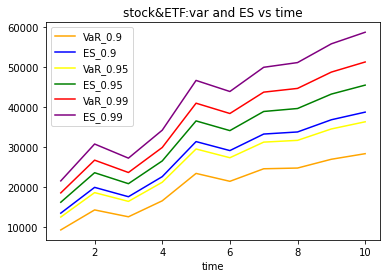

In [144]:
N=stock_norm()
print(N)
a=plot_N(N)


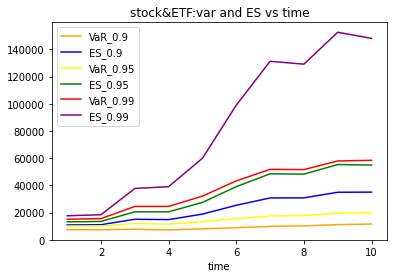

In [96]:
T=stock_t()
b=plot_T(T)


# Options

In [0]:
def getdata2(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      col0=[row[1] for row in rows[1:62]]
      col0=[float(c) for c in col0] # stock value
      col1=[row[2] for row in rows[1+N:53+N]]
      col1=[float(c) for c in col1]  # log return
      col2=[row[3] for row in rows[1+N:53+N]]
      col2=[float(c) for c in col2]  # net stock return
  return col0,col1,col2


In [0]:
def origin_price(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  callprice=S*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)
  putprice=-S*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)
  return callprice,putprice

In [0]:
def delta(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  delta_C=norm.cdf(float(d1))
  delta_P=norm.cdf(float(d1))-1
  return delta_C,delta_P


In [0]:
#OP=[9.5,9,11.21,39.96,38.84,64.99,102.26,78.84,83.26,57.34,51.95] 

In [0]:
def option_N(M,K,share,type,t):  #type=0 for call, type=1 for put, t=maturity date-2020/02/14
  MU=[]
  VAR=[]
  L=[]
  d=[]
  op=[]
  LL=[]
  for i in range(0,10):
    data= getdata2(M,i+1)
    mu=np.mean(data[1])  #mu=mean of stock log return
    variance=np.var(data[1]) #variance of stock log return
    vt=data[0]
    wt=1
    linloss=lin_loss(vt[i+51]*share,wt,mu,variance)
    OP=origin_price(vt[i+51],K,0.02,0.1,(t-7*i)/250)[type]  #t=(2020/06/18-2020/02/14)/250
    Delta=delta(vt[i+51],K,0.02,0.1,(t-7*i)/250)[type]    #strike=100 type=0:call type=1: put
    leverage=Delta*vt[i+51]/OP
    #leverage=Delta*vt[i+51]/OP[i]
    MU.append((-1)**(type+1)*leverage*linloss[0])
    VAR.append(leverage**2*linloss[1])
    L.append(leverage)
    d.append(Delta)
    op.append(OP)
    LL.append(linloss[1])
  return MU,VAR,d,op,L,LL

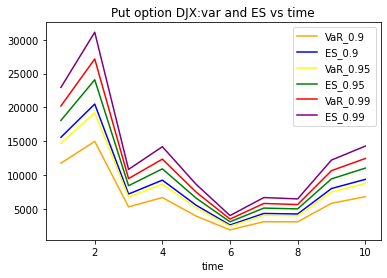

In [168]:
djx=option_N('DIA',293,100,1,125)
c=plot_N(djx)

[171.99702884646496, -754.8741653942833, -1004.3368978973637, -6232.977775254693, -13592.422045207028, -13146.328961790543, -9528.399274679125, -4532.33113447291, -6512.535498750269, -9623.582778699334]


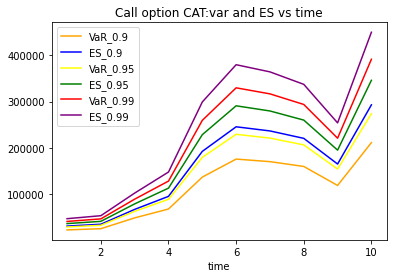

In [171]:
cat=option_N('CAT',135,200,0,91)
print(cat[0])
d=plot_N(cat)

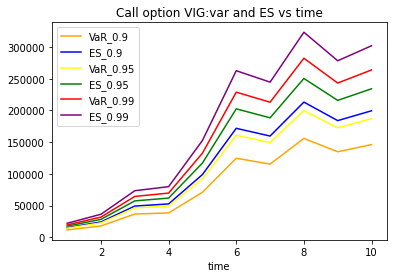

In [173]:
vig=option_N('VIG',131,200,0,91)
e=plot_N(vig)

In [0]:
def option_t(M,K,share,type,t):
  df=[]
  mu=[]
  sigma=[]
  for i in range(0,10):
    data= getdata2(M,i+1)
    nr=np.array(data[2])*share
    T=ss.t.fit(nr)
    #df.append(T[0])
    #mu.append(T[1])
    #sigma.append(T[2])
    vt=data[0]
    wt=1
    OP=origin_price(vt[i+51],K,0.02,0.1,(t-7*i)/250)[type]  #t=(2020/06/18-2020/02/14)/250
    Delta=delta(vt[i+51],K,0.02,0.1,(t-7*i)/250)[type]    #strike=100 type=0:call type=1: put
    leverage=Delta*vt[i+51]/OP
    #leverage=Delta*vt[i+51]/OP[i]
    df.append(T[0])
    mu.append((-1)**(type+1)*leverage*T[1])
    sigma.append(leverage**2*T[2])
    #L.append(leverage)
    #d.append(Delta)
    #op.append(OP)

  return df,mu,sigma

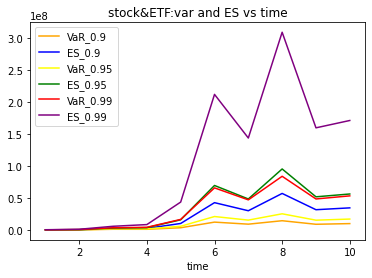

In [184]:
vig2=option_t('VIG',131,200,0,91)
e=plot_T(vig2)


In [180]:
a=getdata2('VIG',0)[2]
b=np.array(a)*200
print(b)


[ 121.1654   41.0416 -502.2568  451.445  -179.7958  405.7556  231.6956
  188.4948   98.1706  137.4526   86.3938 -282.7454 -117.8116 -123.7
 -451.6098 1060.2966  107.9942  357.4616 -114.3556  382.5012  236.5982
 -189.2806  384.4756 -591.4992  138.0188  -72.9508 -303.6362  658.5342
  421.9346   21.6888 -187.3092  -53.1922  -85.176   104.9834   47.5372
    9.9046  188.1744   79.2312  219.8686  -91.118   247.5998   37.6344
  194.1162  272.0718  117.4316  -53.74    141.3178  613.0386 -159.23
 -481.6742  648.8694  410.0188]
